In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
sp=pd.read_csv("50_Startups.csv")

In [52]:
sp.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [53]:
sp.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [54]:
sp.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [55]:
row_indexes=sp[sp["State"]=="New York"].index

In [56]:
sp.loc[row_indexes,'state']="0"

In [57]:
sp.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit,state
0,165349.20,136897.80,471784.10,New York,192261.83,0
1,162597.70,151377.59,443898.53,California,191792.06,NaN
2,153441.51,101145.55,407934.54,Florida,191050.39,NaN
3,144372.41,118671.85,383199.62,New York,182901.99,0
4,142107.34,91391.77,366168.42,Florida,166187.94,NaN
5,131876.90,99814.71,362861.36,New York,156991.12,0
6,134615.46,147198.87,127716.82,California,156122.51,NaN
7,130298.13,145530.06,323876.68,Florida,155752.60,NaN
8,120542.52,148718.95,311613.29,New York,152211.77,0
9,123334.88,108679.17,304981.62,California,149759.96,NaN


In [58]:
row_indexes=sp[sp["State"]=="California"].index

In [59]:
sp.loc[row_indexes,'state']="1"

In [60]:
row_indexes=sp[sp["State"]=="Florida"].index

In [61]:
sp.loc[row_indexes,"state"]="2"

In [62]:
sp.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit,state
0,165349.20,136897.80,471784.10,New York,192261.83,0
1,162597.70,151377.59,443898.53,California,191792.06,1
2,153441.51,101145.55,407934.54,Florida,191050.39,2
3,144372.41,118671.85,383199.62,New York,182901.99,0
4,142107.34,91391.77,366168.42,Florida,166187.94,2
5,131876.90,99814.71,362861.36,New York,156991.12,0
6,134615.46,147198.87,127716.82,California,156122.51,1
7,130298.13,145530.06,323876.68,Florida,155752.60,2
8,120542.52,148718.95,311613.29,New York,152211.77,0
9,123334.88,108679.17,304981.62,California,149759.96,1


In [63]:
sp=sp.drop("State",1)

In [64]:
sp.head()

,R&D Spend,Administration,Marketing Spend,Profit,state
0,165349.20,136897.80,471784.10,192261.83,0
1,162597.70,151377.59,443898.53,191792.06,1
2,153441.51,101145.55,407934.54,191050.39,2
3,144372.41,118671.85,383199.62,182901.99,0
4,142107.34,91391.77,366168.42,166187.94,2


In [65]:
df=pd.DataFrame(sp)

In [66]:
X = df.drop(["Profit"],axis=1)
X

,R&D Spend,Administration,Marketing Spend,state
0,165349.20,136897.80,471784.10,0
1,162597.70,151377.59,443898.53,1
2,153441.51,101145.55,407934.54,2
3,144372.41,118671.85,383199.62,0
4,142107.34,91391.77,366168.42,2
5,131876.90,99814.71,362861.36,0
6,134615.46,147198.87,127716.82,1
7,130298.13,145530.06,323876.68,2
8,120542.52,148718.95,311613.29,0
9,123334.88,108679.17,304981.62,1


In [67]:
Y =df["Profit"]
Y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

118474.03    1
69758.98     1
81229.06     1
101004.64    1
124266.90    1
49490.75     1
192261.83    1
71498.49     1
156991.12    1
108733.99    1
78239.91     1
64926.08     1
144259.40    1
108552.04    1
97427.84     1
126992.93    1
105733.54    1
96712.80     1
96479.51     1
134307.35    1
99937.59     1
90708.19     1
182901.99    1
110352.25    1
42559.73     1
146121.95    1
89949.14     1
152211.77    1
35673.41     1
156122.51    1
166187.94    1
65200.33     1
149759.96    1
155752.60    1
191792.06    1
125370.37    1
107404.34    1
14681.40     1
111313.02    1
81005.76     1
105008.31    1
103282.38    1
132602.65    1
129917.04    1
122776.86    1
96778.92     1
77798.83     1
141585.52    1
191050.39    1
97483.56     1
Name: Profit, dtype: int64

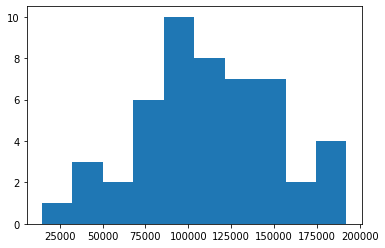

In [68]:
plt.hist(Y)
df.Profit.value_counts()

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [70]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(solver='lbfgs',
    hidden_layer_sizes=100,
    max_iter=10000,
    shuffle=False,
    random_state=9876,
    activation='relu')

In [75]:
mlp.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=100, learning_rate='constant',
             learning_rate_init=0.001, max_iter=10000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=9876, shuffle=False, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [76]:
print(mlp.score(X_test, y_test))

0.8524148488677129


# Activation Function : tanh

In [92]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(solver='lbfgs',
    hidden_layer_sizes=50,
    max_iter=10000,
    shuffle=False,
    random_state=9876,
    activation='tanh')

In [93]:
mlp.fit(X_train,y_train)

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=50, learning_rate='constant',
             learning_rate_init=0.001, max_iter=10000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=9876, shuffle=False, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [94]:
print(mlp.score(X_test, y_test))

0.7544969450817954


# Activation function:identity

In [95]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(solver='lbfgs',
    hidden_layer_sizes=50,
    max_iter=10000,
    shuffle=False,
    random_state=9876,
    activation='identity')

In [96]:
mlp.fit(X_train,y_train)

MLPRegressor(activation='identity', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=50, learning_rate='constant',
             learning_rate_init=0.001, max_iter=10000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=9876, shuffle=False, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [97]:
print(mlp.score(X_test, y_test))

0.9745784311696508


# Activation Function : logistic

In [101]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(solver='lbfgs',
    hidden_layer_sizes=80,
    max_iter=10000,
    shuffle=False,
    random_state=9876,
    activation='logistic')

In [102]:
mlp.fit(X_train,y_train)

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=80, learning_rate='constant',
             learning_rate_init=0.001, max_iter=10000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=9876, shuffle=False, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [103]:
print(mlp.score(X_test, y_test))

0.9446981921880827
